### Week5 - Lab
    Assign X, y
    Train-test split
    Visualize & speculate on training dataset
    Train a logistic regression model
    Evaluate the model, roc score
    Explain findings

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# https://www.kaggle.com/datasets/muhammadtalharasool/simple-gender-classification?select=gender.csv
df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/gender.csv').iloc[:,:-1]
df.columns = df.columns.str.strip()
df.Gender = df.Gender.str.strip()

In [2]:
df.head()

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow


In [3]:
df["Occupation"] = df["Occupation"].str.strip()
df["Education Level"] = df["Education Level"].str.strip()
df["Marital Status"] = df["Marital Status"].str.strip()
df["Favorite Color"] = df["Favorite Color"].str.strip()
#here we strip to remove spaces at the start

In [4]:
df["Occupation"].unique()

array(['Software Engineer', 'Sales Representative', 'Doctor', 'Lawyer',
       'Graphic Designer', 'Business Consultant', 'Marketing Specialist',
       'CEO', 'Project Manager', 'Engineer', 'Accountant', 'Architect',
       'Nurse', 'Analyst', 'Teacher', 'IT Manager', 'Writer',
       'Business Analyst', 'Software Developer'], dtype=object)

In [5]:
df_encoded = pd.get_dummies(df, columns=['Occupation', 'Education Level', 'Marital Status', 'Favorite Color', 'Gender'], drop_first=True)

In [6]:
df_encoded.head()

,Age,Height (cm),Weight (kg),Income (USD),Occupation_Analyst,Occupation_Architect,Occupation_Business Analyst,Occupation_Business Consultant,Occupation_CEO,Occupation_Doctor,...,Marital Status_Widowed,Favorite Color_Blue,Favorite Color_Green,Favorite Color_Grey,Favorite Color_Orange,Favorite Color_Pink,Favorite Color_Purple,Favorite Color_Red,Favorite Color_Yellow,Gender_male
0,32,175,70,75000,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,25,182,85,45000,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,41,160,62,120000,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,38,178,79,90000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,29,165,58,35000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [7]:
df_encoded.columns 

Index(['Age', 'Height (cm)', 'Weight (kg)', 'Income (USD)',
       'Occupation_Analyst', 'Occupation_Architect',
       'Occupation_Business Analyst', 'Occupation_Business Consultant',
       'Occupation_CEO', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Graphic Designer', 'Occupation_IT Manager',
       'Occupation_Lawyer', 'Occupation_Marketing Specialist',
       'Occupation_Nurse', 'Occupation_Project Manager',
       'Occupation_Sales Representative', 'Occupation_Software Developer',
       'Occupation_Software Engineer', 'Occupation_Teacher',
       'Occupation_Writer', 'Education Level_Bachelor's Degree',
       'Education Level_Doctorate Degree', 'Education Level_Master's Degree',
       'Marital Status_Married', 'Marital Status_Single',
       'Marital Status_Widowed', 'Favorite Color_Blue', 'Favorite Color_Green',
       'Favorite Color_Grey', 'Favorite Color_Orange', 'Favorite Color_Pink',
       'Favorite Color_Purple', 'Favorite Color_Red', 'Favorite Colo

In [8]:
X = df_encoded.drop(columns='Gender_male')
y = df_encoded['Gender_male']

In [9]:
X

,Age,Height (cm),Weight (kg),Income (USD),Occupation_Analyst,Occupation_Architect,Occupation_Business Analyst,Occupation_Business Consultant,Occupation_CEO,Occupation_Doctor,...,Marital Status_Single,Marital Status_Widowed,Favorite Color_Blue,Favorite Color_Green,Favorite Color_Grey,Favorite Color_Orange,Favorite Color_Pink,Favorite Color_Purple,Favorite Color_Red,Favorite Color_Yellow
0,32,175,70,75000,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,25,182,85,45000,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,41,160,62,120000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,38,178,79,90000,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,29,165,58,35000,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,32,170,64,60000,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
127,38,176,79,90000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
128,27,162,55,55000,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
129,33,175,77,80000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
y

0      1
1      1
2      0
3      1
4      0
      ..
126    0
127    1
128    0
129    1
130    0
Name: Gender_male, Length: 131, dtype: uint8

### Here we have one hot encoding for all the categorical variables, and the target is alos one hot encoded, where 1 means male and 0 means female. Now to split the data

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)

### Visualise the data

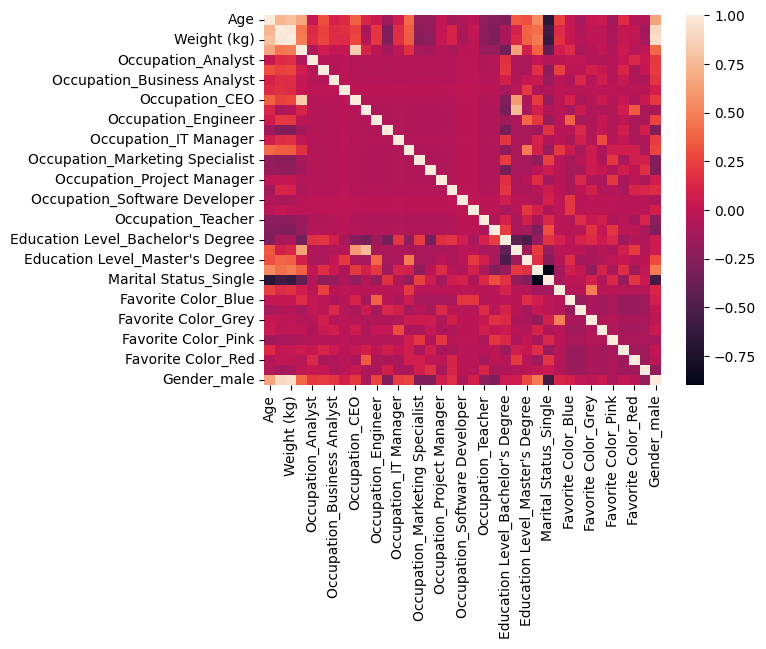

In [12]:
#using a correlation matrix heatmpa, we can see which columns are affecting which other columns in our data

import seaborn as sb
import matplotlib.pyplot as plt
# plotting correlation heatmap
dataplot=sb.heatmap(df_encoded.corr())
plt.show()

### Train Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

### Evaluate the model and the score

In [14]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.9696969696969697

In [15]:
#Accuracy is not the only meaningful metric, let us test for precision and recall as well
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.95      0.97        20

    accuracy                           0.97        33
   macro avg       0.96      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



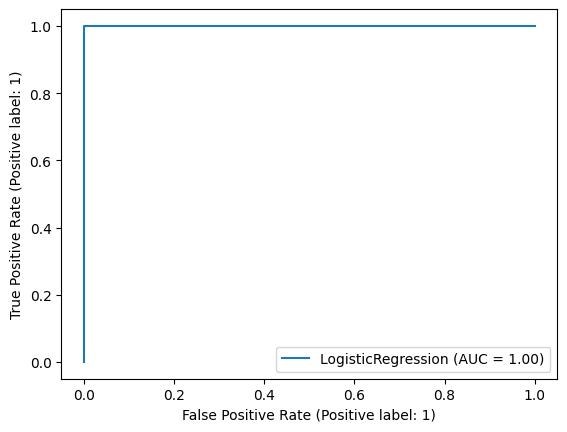

In [16]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(lr, X_test, y_test)

### From the above ROC curve, we can see we are getting the best possible results from the model. It is clear from the precision and recall scores that the model is not overfitting, and is also giving us maximum area under the ROC curve

### This means there must be some sort of collinearity hidden in the columns of the data